In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df = train.append(test)

C:\Users\Tarun\AppData\Local\Temp\ipykernel_11164\1858088059.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [4]:
df.index = df['PassengerId'].values

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
print(len(train))
print(len(test))

891
418


In [7]:
def missing_values(df):
    miss = pd.DataFrame({'MISSING':df.isnull().sum().sort_values()})
    miss['MISS_%'] = df.isnull().sum().sort_values()/len(df)*100
    miss['DTYPES'] = df.dtypes
    
    
    return miss

In [8]:
missing_values(df)

,MISSING,MISS_%,DTYPES
PassengerId,0,0.000000,int64
Pclass,0,0.000000,int64
Name,0,0.000000,object
Sex,0,0.000000,object
SibSp,0,0.000000,int64
Parch,0,0.000000,int64
Ticket,0,0.000000,object
Fare,1,0.076394,float64
Embarked,2,0.152788,object
Age,263,20.091673,float64


In [9]:
df = df.drop('Cabin',axis=1)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# Too many unique values
df = df.drop('Ticket',axis=1)

In [12]:
missing_values(df)

,MISSING,MISS_%,DTYPES
PassengerId,0,0.000000,int64
Pclass,0,0.000000,int64
Name,0,0.000000,object
Sex,0,0.000000,object
SibSp,0,0.000000,int64
Parch,0,0.000000,int64
Fare,1,0.076394,float64
Embarked,2,0.152788,object
Age,263,20.091673,float64
Survived,418,31.932773,float64


In [13]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1044,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [14]:
# Grouped by Pclass and filled with the mean
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda value: value.fillna(value.mean()))

In [15]:
missing_values(df)

,MISSING,MISS_%,DTYPES
PassengerId,0,0.000000,int64
Pclass,0,0.000000,int64
Name,0,0.000000,object
Sex,0,0.000000,object
SibSp,0,0.000000,int64
Parch,0,0.000000,int64
Fare,0,0.000000,float64
Embarked,2,0.152788,object
Age,263,20.091673,float64
Survived,418,31.932773,float64


In [16]:
df.groupby('Pclass')['Embarked'].describe()

,count,unique,top,freq
Pclass,,,,
1,321,3,S,177
2,277,3,S,242
3,709,3,S,495


In [17]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
62,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
830,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


<AxesSubplot:xlabel='Sex', ylabel='Age'>

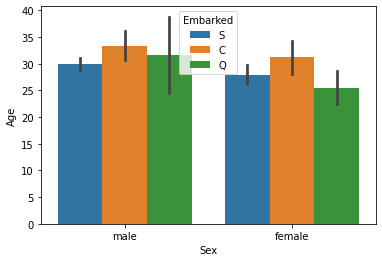

In [18]:
sns.barplot(data=df,x='Sex',y='Age',hue='Embarked')

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

In [20]:
missing_values(df)

,MISSING,MISS_%,DTYPES
PassengerId,0,0.000000,int64
Pclass,0,0.000000,int64
Name,0,0.000000,object
Sex,0,0.000000,object
SibSp,0,0.000000,int64
Parch,0,0.000000,int64
Fare,0,0.000000,float64
Embarked,0,0.000000,object
Age,263,20.091673,float64
Survived,418,31.932773,float64


In [21]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
6,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
18,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S
20,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
27,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C
29,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
1300,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,7.7208,Q
1302,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,7.7500,Q
1305,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1308,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [22]:
df[df['Fare']>30]['Pclass'].value_counts()

1    249
3     53
2     41
Name: Pclass, dtype: int64

In [23]:
df[df['Fare']<30]['Age'].value_counts()

21.0    34
24.0    33
22.0    33
30.0    31
18.0    30
        ..
20.5     1
66.0     1
55.5     1
14.5     1
38.5     1
Name: Age, Length: 94, dtype: int64

In [24]:
df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.159930,14.548028,0.92,28.0,39.0,50.0,80.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.0,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.0,74.0


In [25]:
df['Fare'].mean()

33.28020610290345

In [26]:
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda value: value.fillna(value.mean()))

In [27]:
missing_values(df)

,MISSING,MISS_%,DTYPES
PassengerId,0,0.000000,int64
Pclass,0,0.000000,int64
Name,0,0.000000,object
Sex,0,0.000000,object
Age,0,0.000000,float64
SibSp,0,0.000000,int64
Parch,0,0.000000,int64
Fare,0,0.000000,float64
Embarked,0,0.000000,object
Survived,418,31.932773,float64


In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Embarked', ylabel='count'>

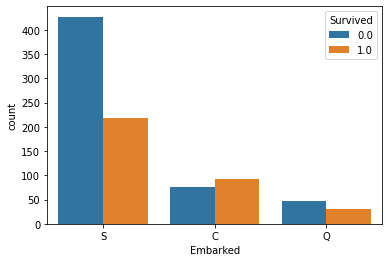

In [29]:
sns.countplot(data=df,x='Embarked',hue='Survived')

In [30]:
df.groupby('Pclass')['SibSp'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,0.436533,0.609064,0.0,0.0,0.0,1.0,3.0
2,277.0,0.393502,0.590100,0.0,0.0,0.0,1.0,3.0
3,709.0,0.568406,1.299681,0.0,0.0,0.0,1.0,8.0


In [31]:
df.groupby('Pclass')['Parch'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,0.365325,0.715602,0.0,0.0,0.0,0.5,4.0
2,277.0,0.368231,0.692717,0.0,0.0,0.0,1.0,3.0
3,709.0,0.400564,0.981639,0.0,0.0,0.0,0.0,9.0


In [32]:
df['Family'] = df['Parch'] + df['SibSp']

In [33]:
df.groupby('Pclass')['Family'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,0.801858,1.062224,0.0,0.0,1.0,1.0,5.0
2,277.0,0.761733,1.029060,0.0,0.0,0.0,1.0,5.0
3,709.0,0.968970,1.921230,0.0,0.0,0.0,1.0,10.0


<AxesSubplot:xlabel='Family', ylabel='Age'>

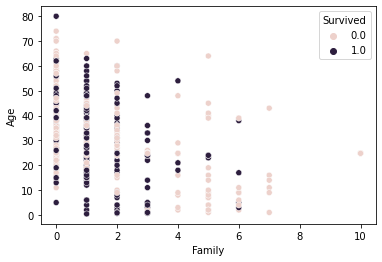

In [34]:
sns.scatterplot(data=df,x='Family',y='Age',hue = 'Survived')

In [35]:
df['Family'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family, dtype: int64

In [36]:
df['Family'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [38]:
df['Family'] = df['Family'].astype('int')

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
1,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,1
2,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,1
3,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,0
4,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,1
5,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1305,1305,NaN,3,"Spector, Mr. Woolf",male,24.816367,0,0,8.0500,S,0
1306,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,108.9000,C,0
1307,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,7.2500,S,0
1308,1308,NaN,3,"Ware, Mr. Frederick",male,24.816367,0,0,8.0500,S,0


In [40]:
missing_values(df)

,MISSING,MISS_%,DTYPES
PassengerId,0,0.000000,int64
Pclass,0,0.000000,int64
Name,0,0.000000,object
Sex,0,0.000000,object
Age,0,0.000000,float64
SibSp,0,0.000000,int64
Parch,0,0.000000,int64
Fare,0,0.000000,float64
Embarked,0,0.000000,object
Family,0,0.000000,int32


In [41]:
df = df.drop(['SibSp','Parch','Name'],axis=1)

In [42]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Embarked'] = df['Embarked'].map({'S':1,'C':0.5,'Q':0})

In [43]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family
1,1,0.0,3,0,22.0,7.2500,1.0,1
2,2,1.0,1,1,38.0,71.2833,0.5,1
3,3,1.0,3,1,26.0,7.9250,1.0,0
4,4,1.0,1,1,35.0,53.1000,1.0,1
5,5,0.0,3,0,35.0,8.0500,1.0,0


In [44]:
df.drop('PassengerId',axis=1,inplace = True)

In [45]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
test = df[891:].drop('Survived',axis=1)

In [47]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
1,0.0,3,0,22.000000,7.2500,1.0,1
2,1.0,1,1,38.000000,71.2833,0.5,1
3,1.0,3,1,26.000000,7.9250,1.0,0
4,1.0,1,1,35.000000,53.1000,1.0,1
5,0.0,3,0,35.000000,8.0500,1.0,0
...,...,...,...,...,...,...,...
1305,NaN,3,0,24.816367,8.0500,1.0,0
1306,NaN,1,1,39.000000,108.9000,0.5,0
1307,NaN,3,0,38.500000,7.2500,1.0,0
1308,NaN,3,0,24.816367,8.0500,1.0,0


In [48]:
train = df[:891]

In [49]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
1,0.0,3,0,22.000000,7.2500,1.0,1
2,1.0,1,1,38.000000,71.2833,0.5,1
3,1.0,3,1,26.000000,7.9250,1.0,0
4,1.0,1,1,35.000000,53.1000,1.0,1
5,0.0,3,0,35.000000,8.0500,1.0,0
...,...,...,...,...,...,...,...
887,0.0,2,0,27.000000,13.0000,1.0,0
888,1.0,1,1,19.000000,30.0000,1.0,0
889,0.0,3,1,24.816367,23.4500,1.0,3
890,1.0,1,0,26.000000,30.0000,0.5,0


In [50]:
test

,Pclass,Sex,Age,Fare,Embarked,Family
892,3,0,34.500000,7.8292,0.0,0
893,3,1,47.000000,7.0000,1.0,1
894,2,0,62.000000,9.6875,0.0,0
895,3,0,27.000000,8.6625,1.0,0
896,3,1,22.000000,12.2875,1.0,2
...,...,...,...,...,...,...
1305,3,0,24.816367,8.0500,1.0,0
1306,1,1,39.000000,108.9000,0.5,0
1307,3,0,38.500000,7.2500,1.0,0
1308,3,0,24.816367,8.0500,1.0,0


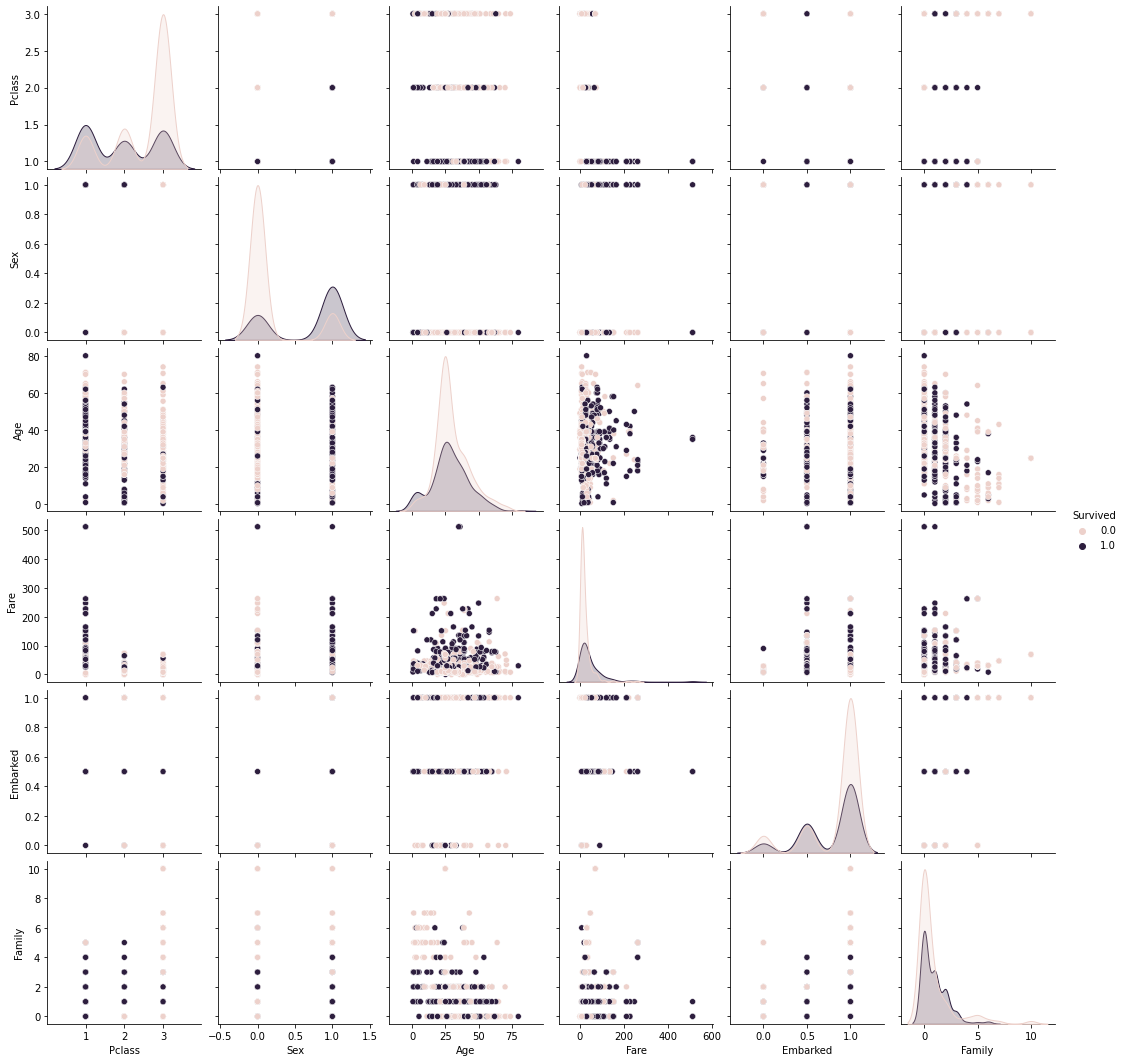

In [51]:

sns.pairplot(df,hue='Survived')

In [52]:
X = train.drop('Survived',axis=1).values

In [53]:
y= train['Survived'].values

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model using Deep Learnig technique

In [58]:
from tensorflow.keras.models import Sequential

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [60]:
ann_mod = Sequential()

In [94]:
ann_mod = Sequential()

ann_mod.add(Dense(units=6,activation='relu'))
ann_mod.add(Dropout(0.1))

ann_mod.add(Dense(units=6,activation='relu'))

ann_mod.add(Dense(units=6,activation='relu'))
ann_mod.add(Dropout(0.1))

ann_mod.add(Dense(units=1,activation='sigmoid'))

ann_mod.compile(optimizer='adam',loss='binary_crossentropy')

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [85]:
X_test.shape

(223, 6)

In [96]:
ann_mod.fit(x=X_train,y=y_train,epochs=1000,validation_data=(X_test,y_test),verbose=2,callbacks=[early_stop])

Epoch 1/1000
21/21 - 2s - loss: 0.8907 - val_loss: 0.8373 - 2s/epoch - 90ms/step
Epoch 2/1000
21/21 - 0s - loss: 0.8179 - val_loss: 0.7858 - 129ms/epoch - 6ms/step
Epoch 3/1000
21/21 - 0s - loss: 0.7721 - val_loss: 0.7519 - 132ms/epoch - 6ms/step
Epoch 4/1000
21/21 - 0s - loss: 0.7408 - val_loss: 0.7282 - 148ms/epoch - 7ms/step
Epoch 5/1000
21/21 - 0s - loss: 0.7171 - val_loss: 0.7087 - 135ms/epoch - 6ms/step
Epoch 6/1000
21/21 - 0s - loss: 0.7023 - val_loss: 0.6960 - 139ms/epoch - 7ms/step
Epoch 7/1000
21/21 - 0s - loss: 0.6906 - val_loss: 0.6861 - 127ms/epoch - 6ms/step
Epoch 8/1000
21/21 - 0s - loss: 0.6822 - val_loss: 0.6781 - 114ms/epoch - 5ms/step
Epoch 9/1000
21/21 - 0s - loss: 0.6746 - val_loss: 0.6706 - 144ms/epoch - 7ms/step
Epoch 10/1000
21/21 - 0s - loss: 0.6660 - val_loss: 0.6632 - 126ms/epoch - 6ms/step
Epoch 11/1000
21/21 - 0s - loss: 0.6597 - val_loss: 0.6544 - 140ms/epoch - 7ms/step
Epoch 12/1000
21/21 - 0s - loss: 0.6499 - val_loss: 0.6453 - 141ms/epoch - 7ms/step
Epo

Epoch 99/1000
21/21 - 0s - loss: 0.4813 - val_loss: 0.4559 - 132ms/epoch - 6ms/step
Epoch 100/1000
21/21 - 0s - loss: 0.4765 - val_loss: 0.4530 - 130ms/epoch - 6ms/step
Epoch 101/1000
21/21 - 0s - loss: 0.4847 - val_loss: 0.4541 - 142ms/epoch - 7ms/step
Epoch 102/1000
21/21 - 0s - loss: 0.4795 - val_loss: 0.4550 - 136ms/epoch - 6ms/step
Epoch 103/1000
21/21 - 0s - loss: 0.4668 - val_loss: 0.4526 - 123ms/epoch - 6ms/step
Epoch 104/1000
21/21 - 0s - loss: 0.4692 - val_loss: 0.4546 - 123ms/epoch - 6ms/step
Epoch 105/1000
21/21 - 0s - loss: 0.4644 - val_loss: 0.4505 - 135ms/epoch - 6ms/step
Epoch 106/1000
21/21 - 0s - loss: 0.4715 - val_loss: 0.4525 - 143ms/epoch - 7ms/step
Epoch 107/1000
21/21 - 0s - loss: 0.4690 - val_loss: 0.4503 - 139ms/epoch - 7ms/step
Epoch 108/1000
21/21 - 0s - loss: 0.4659 - val_loss: 0.4500 - 127ms/epoch - 6ms/step
Epoch 109/1000
21/21 - 0s - loss: 0.4773 - val_loss: 0.4497 - 141ms/epoch - 7ms/step
Epoch 110/1000
21/21 - 0s - loss: 0.4681 - val_loss: 0.4484 - 139m

In [97]:
losses = pd.DataFrame(ann_mod.history.history)

<AxesSubplot:>

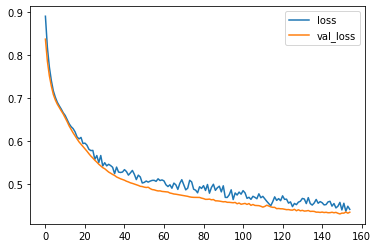

In [98]:
losses.plot()

In [99]:
preds =np.round(ann_mod.predict(X_test))

7/7 [==============================] - 0s 5ms/step


In [100]:
preds

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

In [91]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       134
         1.0       0.81      0.67      0.74        89

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



In [1]:
# Using ML models 

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [219]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [220]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

In [221]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [222]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [223]:
preds = rfc.predict(X_test)

In [224]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       134
         1.0       0.74      0.78      0.76        89

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.80      0.80      0.80       223



In [225]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [226]:
preds = rfc.predict(X_test)

In [227]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       134
         1.0       0.74      0.78      0.76        89

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.80      0.80      0.80       223



In [228]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [229]:
preds = rfc.predict(X_test)

In [230]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83       134
         1.0       0.74      0.78      0.76        89

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.80      0.80      0.80       223



In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
scaler = StandardScaler()

In [233]:
scaled_xtrain = scaler.fit_transform(X_train)
scaled_xtest   = scaler.transform(X_test)

In [234]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [235]:
from sklearn.svm import SVC

In [236]:
svc = SVC()
knn = KNeighborsClassifier()
log = LogisticRegression()

In [237]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(scaled_xtrain,y_train)

KNeighborsClassifier(n_neighbors=17)

In [238]:
preds = knn.predict(scaled_xtest)

In [239]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       134
         1.0       0.81      0.69      0.74        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [240]:
err=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_xtrain,y_train)
    
    preds = knn.predict(scaled_xtest)
    
    err1 = 1 - accuracy_score(y_test,preds)
    err.append(err1)
    
    

(0.0, 20.0)

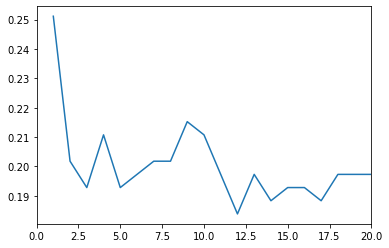

In [241]:
plt.plot(range(1,100),err)
plt.xlim(0,20)

In [242]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(scaled_xtrain,y_train)
preds = knn.predict(scaled_xtest)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.86       134
         1.0       0.82      0.69      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



In [110]:
from sklearn.model_selection import GridSearchCV

In [107]:
xgb = XGBClassifier()

In [108]:
params = {'n_estimators':[68,100,150,200,250,300],'max_depth':[1,3,5,6,7,None],'learning_rate':[0.1,0.15,0.2,0.05]}

In [111]:
grid = GridSearchCV(xgb,param_grid=params,n_jobs=-1,cv=10,verbose=3)

In [112]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [113]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}

In [114]:
preds = grid.predict(X_test)